# Abaloan Case Study

# Context

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Importing Requried Libraries 

In [1]:
## Importing library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Laoding our dataset
df=pd.read_csv('abalone dataset.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
## Checking shape of dataset
df.shape

(4177, 9)

Observation:
    
We have 4177 rows and 9 attribute including Target attribute.

Our target attributre is Rings in this Dataset.

In [5]:
## checking datatype
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

observation:

In this Dataset only Sex attribute have object datatype.

Our target attribute (Rings) have int datatype and rest independent attributes having float datatype.

It is clear that our datatype of respective attributes are completly fine.

In [6]:
##Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Onservation:
    
1- we can see that all features have 4177 data records (rows) which shows that we don't have any null value in our dataset.

2-We have only 1 feature (Sex) have object datatype.

In [7]:
## checking null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

observation:
    
1- There is no null values in our dataset.

<AxesSubplot:title={'center':'Null Values Heatmap'}>

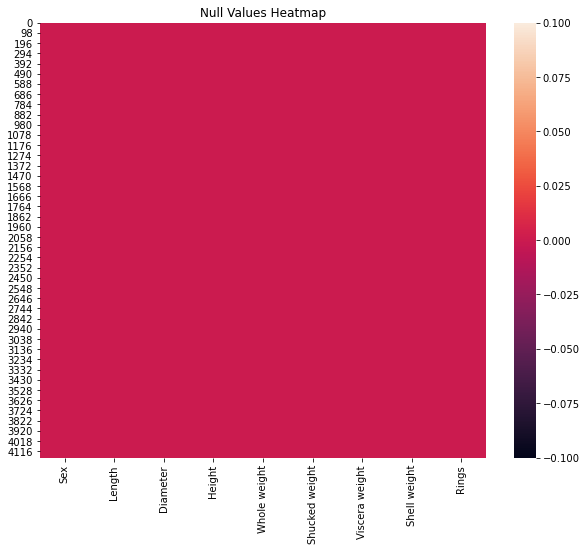

In [8]:
plt.figure(figsize=(10,8))
plt.title('Null Values Heatmap')
sns.heatmap(df.isnull())

No null values present in our dataset.

In [9]:
## checking values count of object datatype
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

observation

We have 3 unique values in SEx columns

All have approximately same in counts.

M-Male, F-Female , I-Infant

# Statistical Summary

In [10]:
## Statistical Summary
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observation:
    
1-From the above table we can see that there is appriximatly similarity between mean value and median (50% quantile) values. We can say that data is Normally distributed.

2-If we comapire the 75%(3rd quantile ) and Max values , also there is no such huge difference so we can infer that our dataset have very few outliers.

3- In our dataset mean>median which mean our numeric features are right skewed (little) 

4-In height the minimum height shows as Zero which is dubious we will further explore on this.

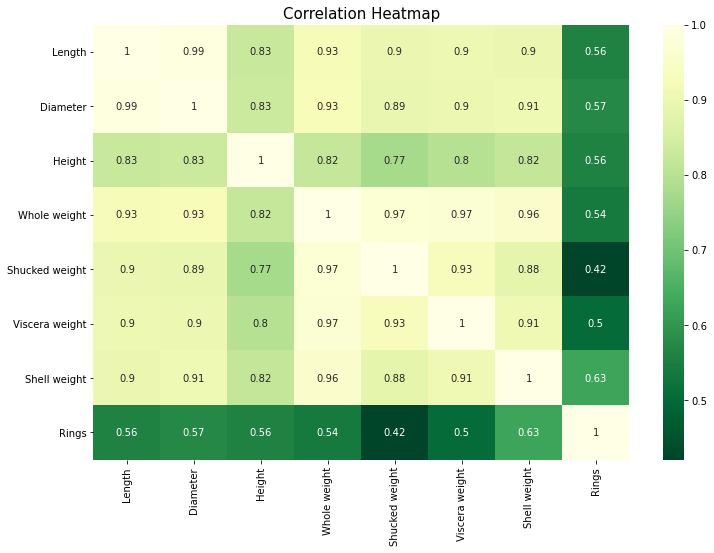

In [11]:
plt.figure(figsize=(12,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True,cmap='YlGn_r')
plt.show()

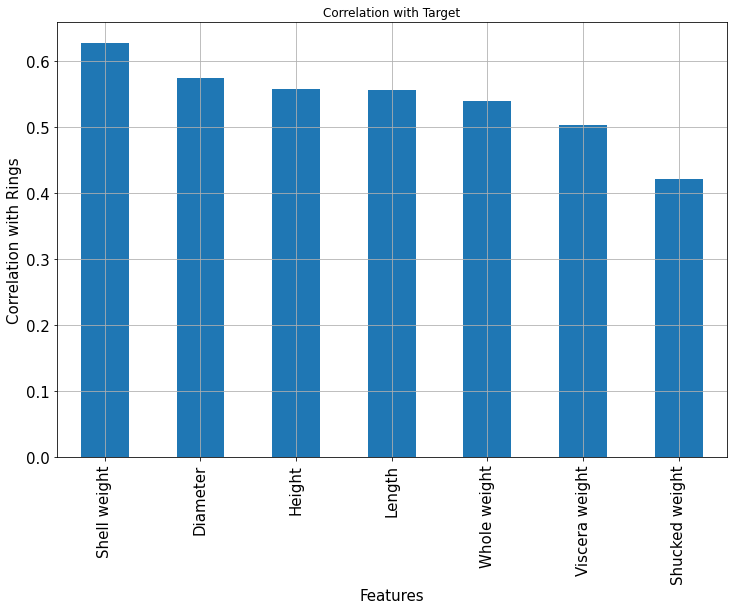

In [12]:
## plotting the correlation with target

df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot.bar(figsize=(12,8),grid=True,title='Correlation with Target',fontsize=15)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Correlation with Rings',fontsize=15)
plt.show()

Obseravtion:
    
1- we can see that Shell weight have heighest correlation with our target attribute.

2- Diameter.Height,Length,Whole weight and Viscera weight have also positive correlation (more that 0.5) with target variable.

Multicollinearity

3-Diameter and lenght having very string correlation with each other.

4- Shucked weight and whole weight are also positively correlated (.97) with each other.

5- Feature are highly correlated with each other in this dataset which can cause problem of Multicollinearity .

# Data analysis and Visualization

<AxesSubplot:title={'center':'Count of Sex'}, xlabel='Sex', ylabel='count'>

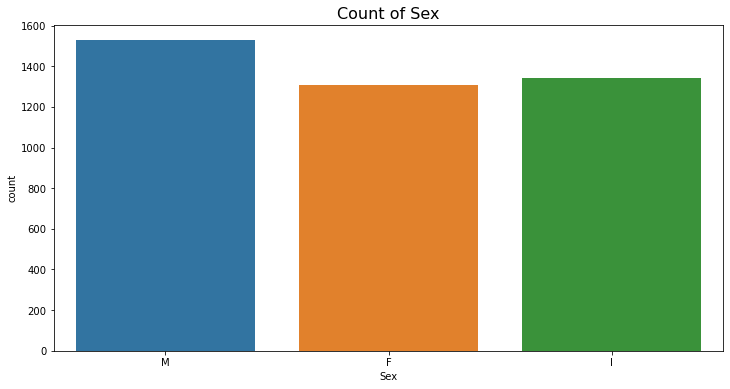

In [13]:
plt.figure(figsize=(12,6))
plt.title('Count of Sex',fontsize=16)
sns.countplot(df['Sex'])

observation

Heighest number of datapoints are of Male category.

Female and Infant have appriximatly same number of datapoints.

In [14]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

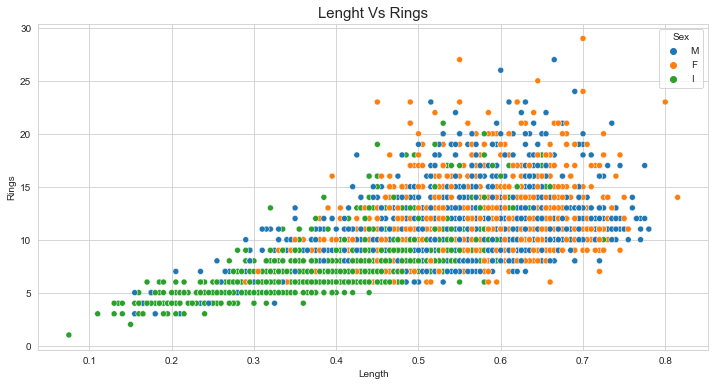

In [15]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.title('Lenght Vs Rings',fontsize=15)
sns.scatterplot(df['Length'],df['Rings'],hue='Sex',data=df)
plt.show()

Observataion

There is a linear relationship between Length and number of Rings.

Infants having small rings counts whereas Male and Female  having mix number of Rings count.

Some male abalone also shows a few rings in this scatter plot.

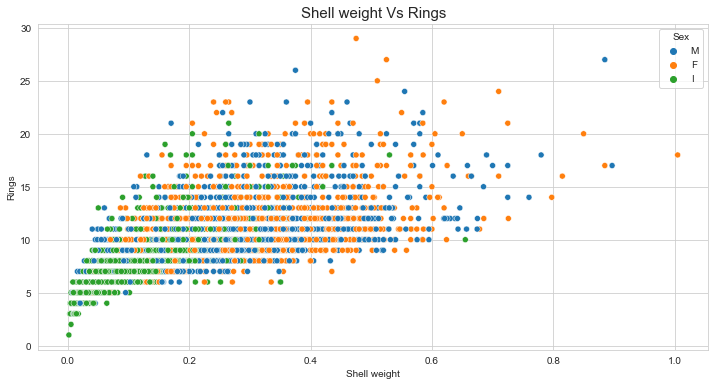

In [16]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.title('Shell weight Vs Rings',fontsize=15)
sns.scatterplot(df['Shell weight'],df['Rings'],hue='Sex',data=df)
plt.show()

ObserVATION:
    
As shell weights get increase ut shows that number of rings counts also increases.

infants havings a less shell weight.

Majority shell weights ranges between (0.005-.8)

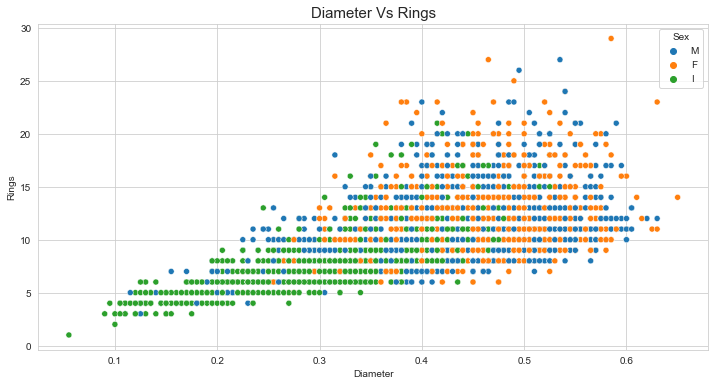

In [17]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.title('Diameter Vs Rings',fontsize=15)
sns.scatterplot(df['Diameter'],df['Rings'],hue='Sex',data=df)
plt.show()

observation

1- Clear linear relation between Diameter and Rings count.

2-The diameter for infants having range from .1-.4 (majority).

3-As diameter increases rings counts(age) also get increase.

<Figure size 864x432 with 0 Axes>

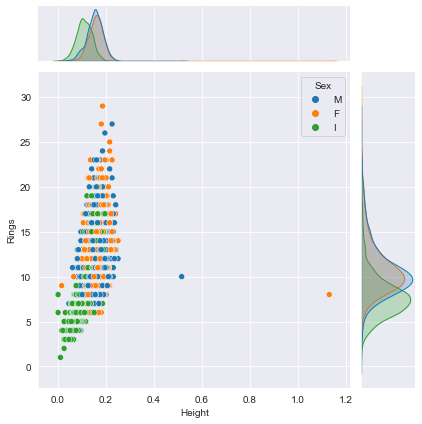

In [18]:
sns.set_style('darkgrid')

plt.figure(figsize=(12,6))
sns.jointplot(df['Height'],df['Rings'],hue='Sex',data=df)
plt.show()

observation:
    
There is a very steep linear relationship between Height and Rings count(age) of abalone.

Some outliers also present Height columns.

The Range of Height is .001-0.2.


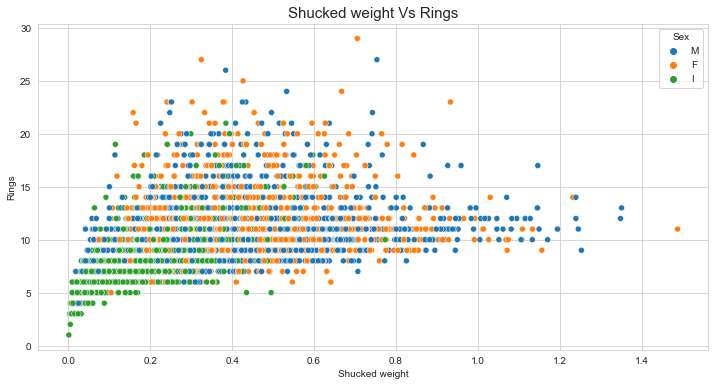

In [19]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.title('Shucked weight Vs Rings',fontsize=15)
sns.scatterplot(df['Shucked weight'],df['Rings'],hue='Sex',data=df)
plt.show()

observation:
    
This graph shows a weak linear relation.

we can see a saturation line after 0.5 shucked weight.

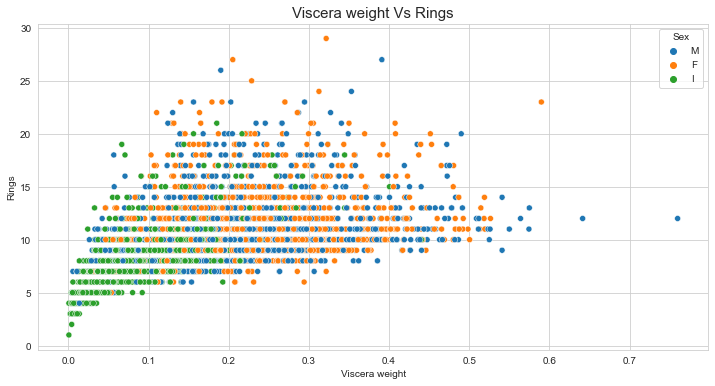

In [20]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.title('Viscera weight Vs Rings',fontsize=15)
sns.scatterplot(df['Viscera weight'],df['Rings'],hue='Sex',data=df)
plt.show()

observation:
    
As Viscera weight increases we can see rings counts increases.

There is some outliers also present.

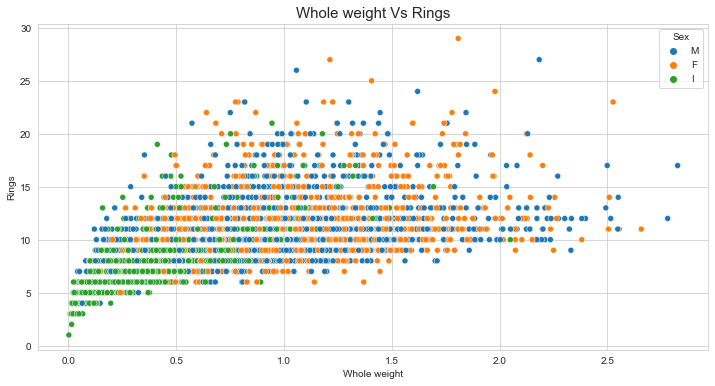

In [21]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.title('Whole weight Vs Rings',fontsize=15)
sns.scatterplot(df['Whole weight'],df['Rings'],hue='Sex',data=df)
plt.show()

Obervation:

we are getting similar trend as earlier.

As whole weight increases Rings count increases.

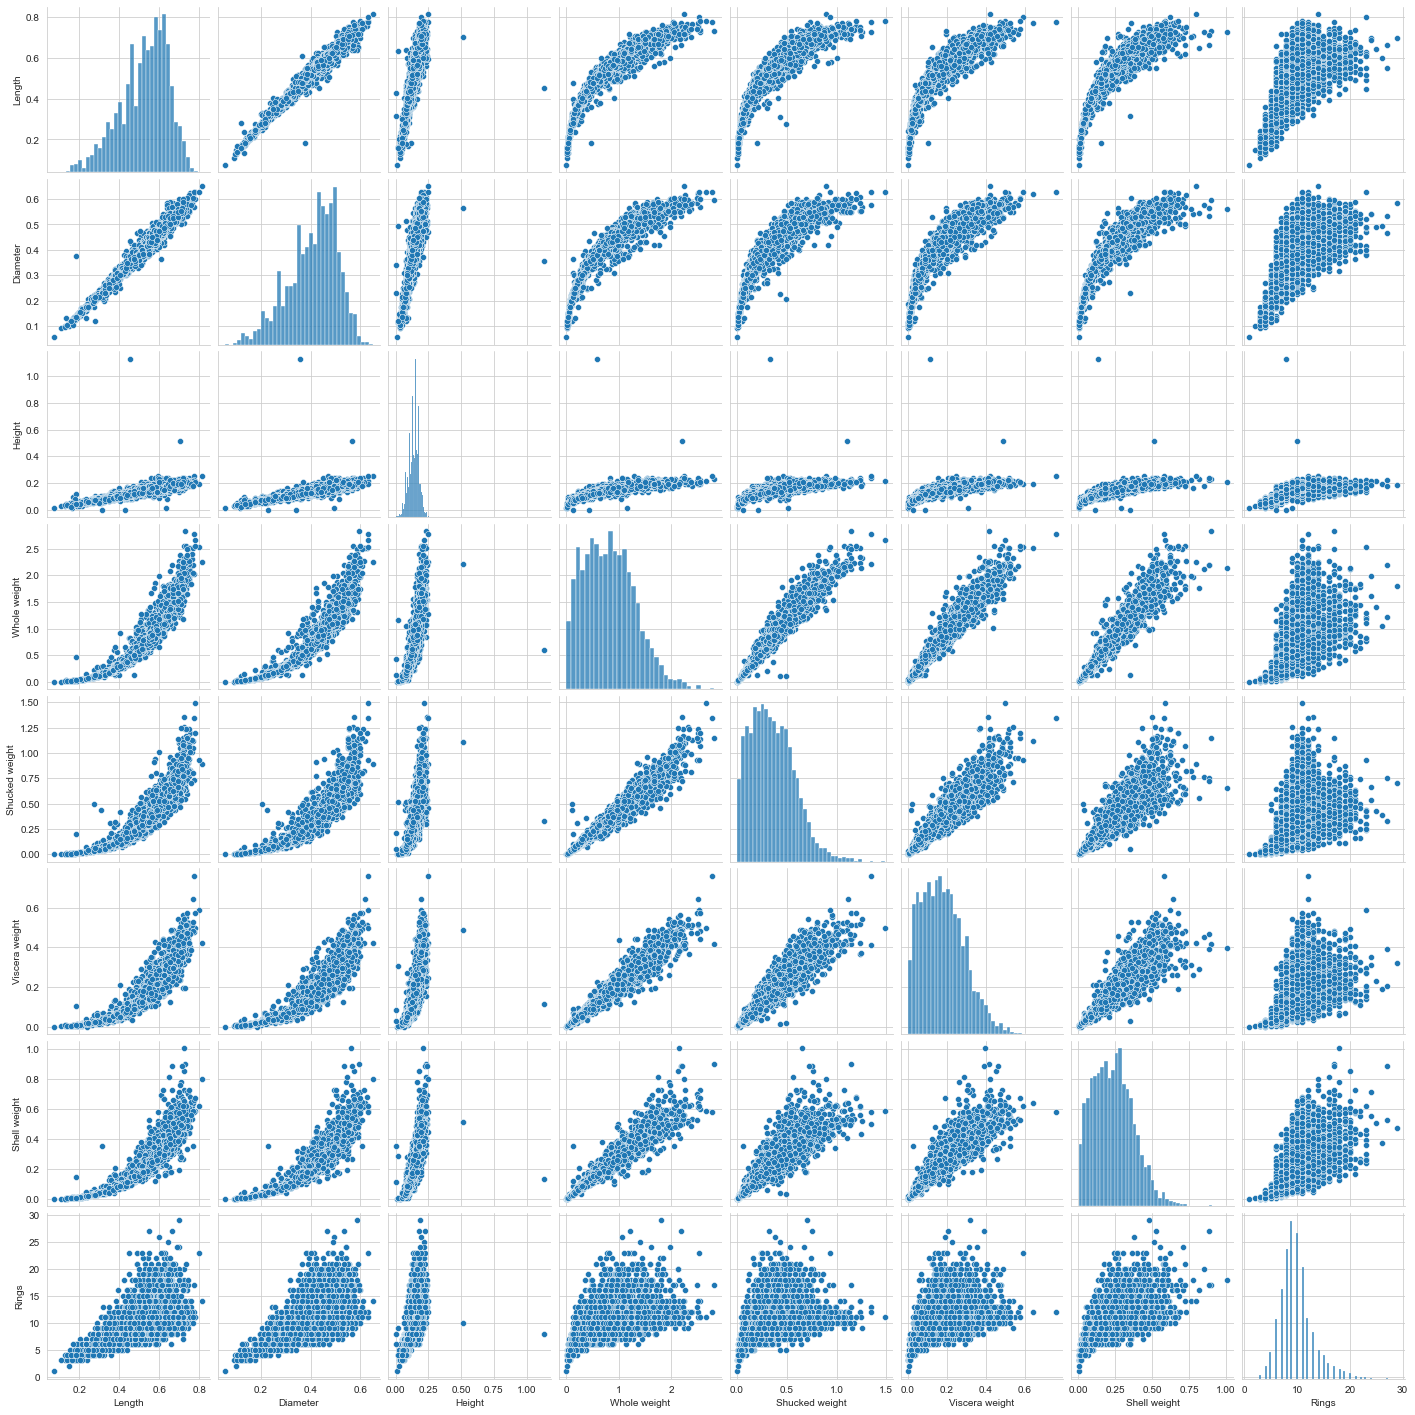

In [22]:
# Getting plot of all elemensts with each other.
sns.pairplot(df)

The above pairplot shows a linear relation between between differnt attributes with each other.

We can spot some outliers in our dataset also.

The distribution is a little right skewed but it is near to Normal Distribution.

# Distribution

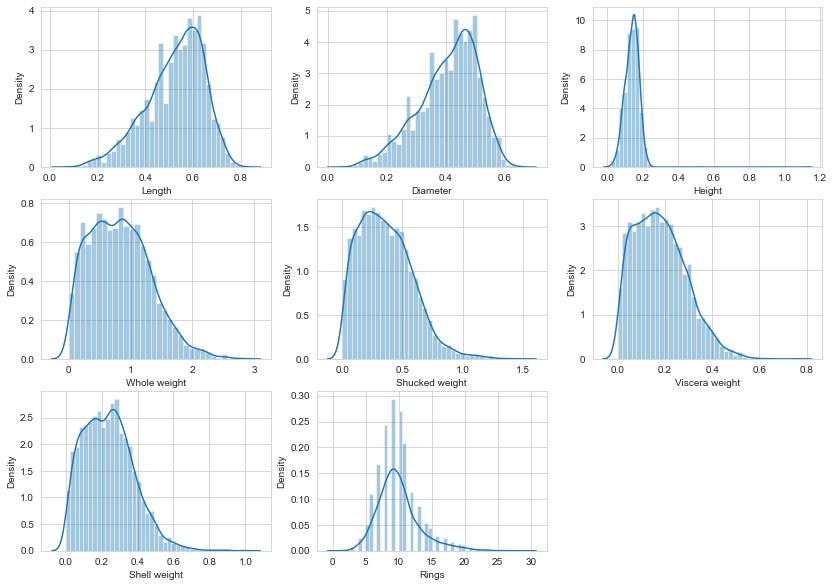

In [23]:
di=df.select_dtypes(exclude='object')
plt.figure(figsize=(14,10))
plot=1
for col in di:
    if plot<=9:
        plt.subplot(3,3,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()        

Observation:
    
Our data is seems Normal distributed.

we can see that some extreme values are present in whole weight,shell weight,viscera weight,height which cause the tail is going towards right side.

we can treat skewness by some transformation.}

# Outliers Detection by Box Plot

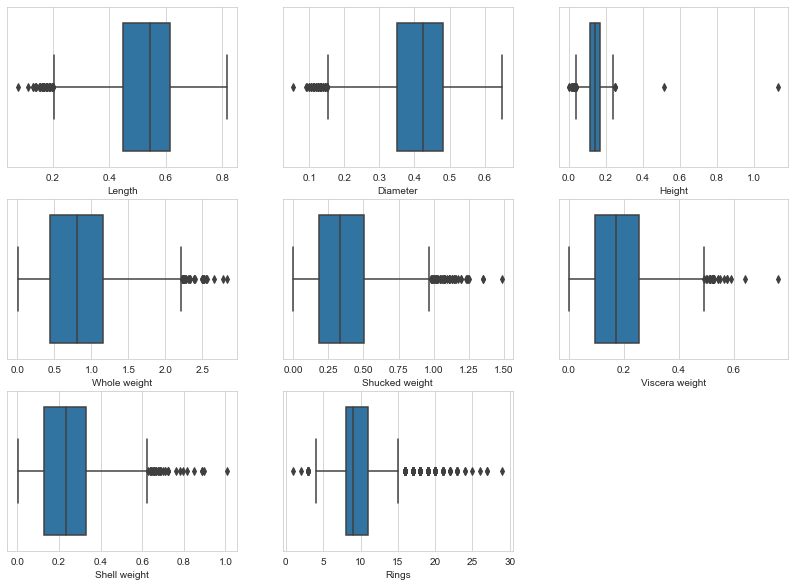

In [24]:
plt.figure(figsize=(14,10))
plot=1
for col in di:
    if plot<=9:
        plt.subplot(3,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show() 

1-Height present some extreme outliers.

2-We have outliers present in other atrributes like length,whole weight,shucked weight,viscra weight but all outliers are near to whisker, they are not at very extrme point.

3- because our data set is normally distributed we can treat it with z-score.

# Replacing Outliers with Median Value 

In [25]:
def outlier_normally(data,col):
    lower_boundary=data[col].mean()-3*data[col].std()
    upper_boundary=data[col].mean()+3*data[col].std()
    print(lower_boundary,upper_boundary)
    data[col]=np.where((data[col]>upper_boundary)| (data[col]<lower_boundary),data[col].median(),data[col])
    plt.subplot(2,2,1)                   
    sns.distplot(data[col])
    plt.subplot(2,2,2)
    sns.boxplot(data[col])

In [26]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

0.1637133618986099 0.8842708372874097


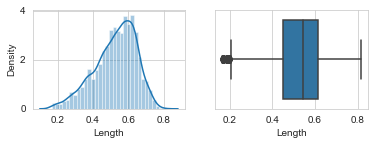

In [27]:
outlier_normally(df,'Length')

0.11016165608789152 0.7056008528898465


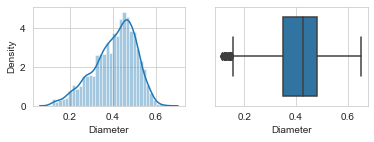

In [28]:
outlier_normally(df,'Diameter')

0.014035229507890296 0.26499756915143247


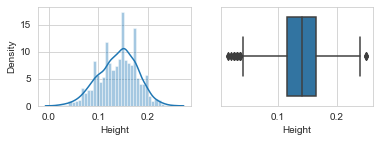

In [29]:
outlier_normally(df,'Height')

-0.6424248952484118 2.2999092141375717


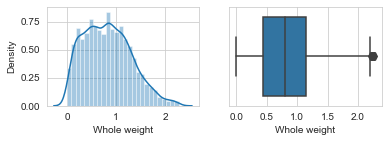

In [30]:
outlier_normally(df,'Whole weight')

-0.3065213584714594 1.0252563357278615


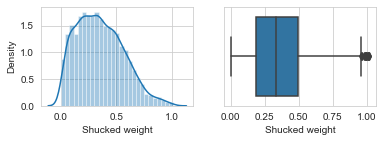

In [31]:
outlier_normally(df,'Shucked weight')

-0.14824914292652724 0.5094363586315793


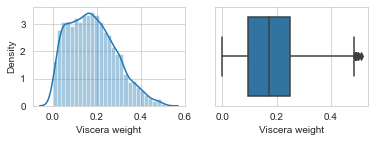

In [32]:
outlier_normally(df,'Viscera weight')

-0.1787771490986393 0.6564388680356752


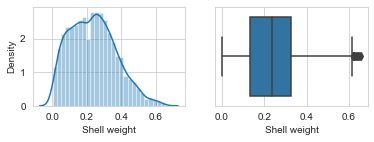

In [33]:
outlier_normally(df,'Shell weight')

we have sucessfully replaced outliers with medain values.

# Skewness

In [34]:
df.skew()

Length           -0.589085
Diameter         -0.570757
Height           -0.243747
Whole weight      0.426594
Shucked weight    0.469449
Viscera weight    0.469203
Shell weight      0.396715
Rings             1.114102
dtype: float64

In [35]:
## removing skewness
from scipy import stats
df['Diameter'],parameters=stats.boxcox(df['Diameter'])
df['Length'],parameters=stats.boxcox(df['Length'])

In [36]:
df.skew()

Length           -0.120005
Diameter         -0.129266
Height           -0.243747
Whole weight      0.426594
Shucked weight    0.469449
Viscera weight    0.469203
Shell weight      0.396715
Rings             1.114102
dtype: float64

In [37]:
## recheck null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

we can see our skewness value in between range (-.5,.5). we have sucessfully removed skewness.

# Encoding

In [38]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['Sex']=oe.fit_transform((df['Sex']).values.reshape(-1,1))


In [39]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,-0.413216,-0.469346,0.095,0.5140,0.2245,0.1010,0.150,15
1,2.0,-0.461154,-0.510201,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,-0.372466,-0.442688,0.135,0.6770,0.2565,0.1415,0.210,9
3,2.0,-0.420721,-0.469346,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,-0.469053,-0.513725,0.080,0.2050,0.0895,0.0395,0.055,7


# Splitting Data into Input and Output Variable

In [40]:
x=df.drop(['Rings'],axis=1)
y=df[['Rings']]

In [41]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,-0.413216,-0.469346,0.095,0.5140,0.2245,0.1010,0.1500
1,2.0,-0.461154,-0.510201,0.090,0.2255,0.0995,0.0485,0.0700
2,0.0,-0.372466,-0.442688,0.135,0.6770,0.2565,0.1415,0.2100
3,2.0,-0.420721,-0.469346,0.125,0.5160,0.2155,0.1140,0.1550
4,1.0,-0.469053,-0.513725,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0.0,-0.351632,-0.426941,0.165,0.8870,0.3700,0.2390,0.2490
4173,2.0,-0.336051,-0.432283,0.135,0.9660,0.4390,0.2145,0.2605
4174,2.0,-0.329656,-0.413180,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.0,-0.313265,-0.407515,0.150,1.0945,0.5310,0.2610,0.2960


In [42]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


# Feature Importance

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [44]:
##use inbuilt class feature_importances of tree based classifiers
print(extra.feature_importances_)

[0.03654513 0.13134568 0.12862605 0.12170664 0.14571159 0.14602759
 0.13841514 0.15162218]


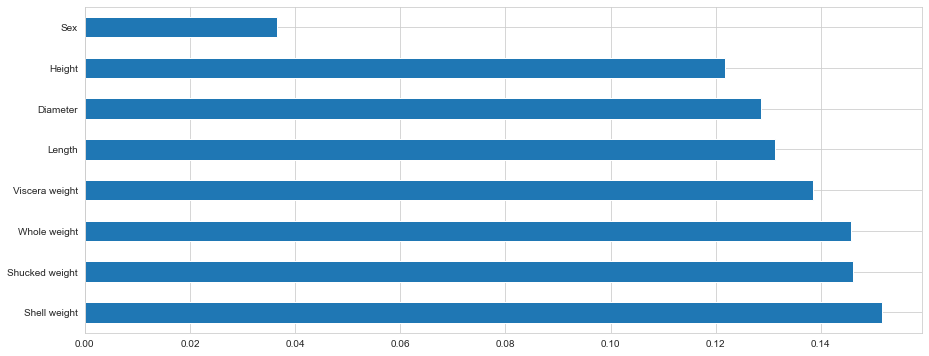

In [45]:
plt.figure(figsize=(15,6))
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(9).plot(kind='barh')
plt.show()

Observation:

1- we can clearly see that sex has least important factor to decide the age of Abalone.

2-shell weight,shucked weight,whole weight,viscera weight are most important features to decide counts of Rings.

# Model Building

In [46]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [47]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    
    return final_r


In [48]:
## Linear Regression
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 61 is 0.5010557313887896
cross validation score 0.30136849961578627
Standard Deviation 0.1838734465948295
MAE 1.6567934677217169
MSE 5.289285661650298
RMSE 2.299844703811607


61

In [49]:
# Decision Tree Regressor
dt=DecisionTreeRegressor()
maxr2_score(dt,x,y)

max r2 score corresponding to 90 is 0.24617310675767456
cross validation score -0.13282661578984378
Standard Deviation 0.40815105000339713
MAE 2.061004784688995
MSE 8.876794258373206
RMSE 2.9793949483700892


90

In [50]:
## K Nearest Neighbors Regressor
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 88 is 0.5559392880369801
cross validation score 0.41917384224875154
Standard Deviation 0.07484849441669685
MAE 1.4944976076555025
MSE 4.693444976076555
RMSE 2.1664360078425013


88

In [51]:
## Suport Vector Regressor
svm=SVR()
maxr2_score(svm,x,y)

max r2 score corresponding to 48 is 0.4884612468018956
cross validation score 0.3870339848314994
Standard Deviation 0.12767092344903008
MAE 1.54479000810541
MSE 5.182406088372772
RMSE 2.2764898612497206


48

In [54]:
## Naive Bayes
gnb=GaussianNB()
maxr2_score(gnb,x,y)

max r2 score corresponding to 58 is 0.21775464407265765
cross validation score -0.04704689030866109
Standard Deviation 0.18833670638061137
MAE 1.8971291866028708
MSE 8.361244019138756
RMSE 2.891581577465653


58

In [55]:
## Random Forest Regressor
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 51 is 0.5766036421696619
cross validation score 0.4381542440124552
Standard Deviation 0.09741796641083268
MAE 1.494354066985646
MSE 4.361086363636364
RMSE 2.0883214224913664


51

In [56]:
## Adaboost Regressor
adb=AdaBoostRegressor()
maxr2_score(adb,x,y)

max r2 score corresponding to 64 is 0.37934078701872376
cross validation score -0.2635948825466247
Standard Deviation 0.8534701095069783
MAE 2.5882695187025457
MSE 8.860508782911342
RMSE 2.9766606764815067


64

In [57]:
## Gradient Boost Regressor
gb=GradientBoostingRegressor()
maxr2_score(gb,x,y)

max r2 score corresponding to 43 is 0.575682878999174
cross validation score 0.450588545697018
Standard Deviation 0.10193270351728788
MAE 1.5235470070653363
MSE 4.464247422073177
RMSE 2.1128765752104823


43

In [59]:
best_model=pd.DataFrame({'Model':['LinearRegression','DecisionTreeRegressor','KNeighborsRegressor','SVR','GaussianNB','RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor'],
                         'R_2 score':[50.10,23.02,55.59,48.84,21.77,58.55,34.29,57.55],
                         'Cross_validation':[30.13,-16.25,41.91,38.70,-4.7,43.60,-22.17,45.02]})
best_model                        

,Model,R_2 score,Cross_validation
0,LinearRegression,50.10,30.13
1,DecisionTreeRegressor,23.02,-16.25
2,KNeighborsRegressor,55.59,41.91
3,SVR,48.84,38.70
4,GaussianNB,21.77,-4.70
5,RandomForestRegressor,58.55,43.60
6,AdaBoostRegressor,34.29,-22.17
7,GradientBoostingRegressor,57.55,45.02


from above table we can see that the Support Vector Regressor(SVR) has  mimimun difference between the r_2 score and Cross validation.

Hence, we will select as a less overfit/underfit model as compared to other models.

Further we will do some Hyperparameter tuning to increase it's Goodness of Fit value (r_2 score)

# Hyperparameter Tuning

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
param={'kernel':['poly','linear','rbf'],'C':[.0001,.001,.01,0.1],'gamma':[.0002,.002,1,10]}
glf=GridSearchCV(estimator=svm,param_grid=param,scoring='r2')
glf.fit(x_train,y_train)
glf.best_params_

{'C': 0.1, 'gamma': 10, 'kernel': 'poly'}

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
svm_final=SVR(kernel='poly',gamma=10,C=0.1)
svm_final.fit(x_train,y_train)
pred=svm.predict(x_test)
print('Error')
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test))
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test)))
print('R_2 score:',r2_score(pred,y_test))

Error
 Mean Absolute Error (MAE) : 1.4472893610043458
Mean Squared Error (MSE) : 4.498647278799684
Root Mean Squared Error : 2.1210014801502814
R_2 score: -0.49039638252956386


<AxesSubplot:ylabel='Rings'>

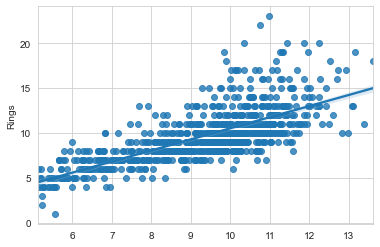

In [62]:
## best fit line
sns.regplot(pred,y_test)

from above observation we can see that our mean absolute error ,mean squared error and root mean squared error has decreased(improved). so we will save this as our best model.|

# Saving our Model

In [63]:
import joblib
joblib.dump(svm_final,'abaloansvm_final.pkl')

['abaloansvm_final.pkl']